In [1]:
# append rxn_yield_context to the PYTHONPATH
import sys
import os
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from tqdm import tqdm
import pandas as pd
import numpy as np

target_dir = "../data/reaxys_output"

# Post-analyze the first model training process

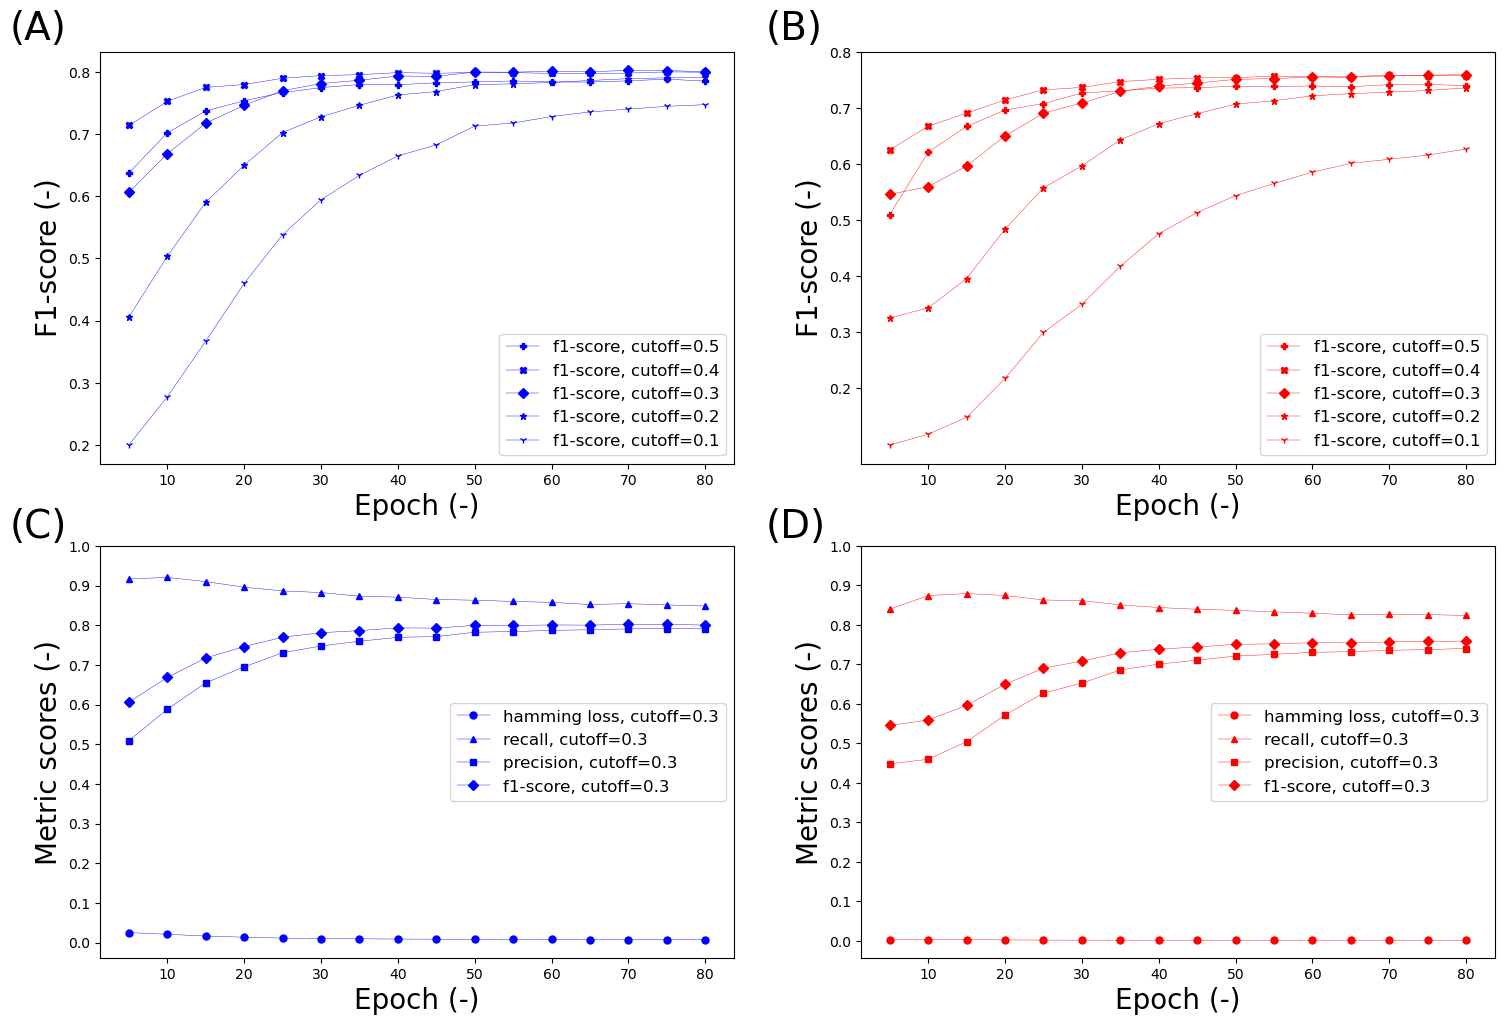

In [2]:
def plot_summary_first(data, labels, line_styles, ylabel, label_names, title=None, log_scale=False, legend=False):
    epochs = data['epoch']
    if log_scale:
        plt.yscale("log")
    for label, style in zip(labels, line_styles):
        if 'accuracy' in label:
            plt.plot(epochs, 1-np.array(data[label]), label=label.replace('accuracy', 'hamming loss'), 
                    color = style[0], marker = style[1], markersize = 5, linewidth = 0.3, markevery=1)
        else:
            plt.plot(epochs, data[label], label=label, 
                    color = style[0], marker = style[1], markersize = 5, linewidth = 0.3, markevery=1)
    plt.xlabel('Epoch (-)', fontsize=20)
    #plt.xticks(fontsize=12, rotation=90)
    if label_names:
        label_names = [name.replace('accuracy', 'hamming loss') for name in label_names]
        plt.legend(label_names, fontsize=12)
    else:
        plt.legend()
    plt.ylabel(ylabel, fontsize=20)
    if legend:
        plt.legend()
#     plt.title(title, fontsize=18)
    return

# metrics = ['recall', 'precision', 'f1-score'] # not use accuracy ['accuracy', 'recall', 'precision', 'f1-score']
metrics = ['accuracy', 'recall', 'precision', 'f1-score']
solv_data = pd.read_csv(os.path.join(target_dir, "solvent_task.csv"))
reag_data = pd.read_csv(os.path.join(target_dir, "reagent_task.csv"))

labels = ["f1-score {:.1f}".format(x) for x in np.linspace(0.5, 0.1, 5)]
label_names = ["f1-score, cutoff={:.1f}".format(x) for x in np.linspace(0.5, 0.1, 5)]
line_styles = [('b', 'P'), ('b', 'X'), ('b', 'D'), ('b', '*'), ('b', '1')]
ylabel = "F1-score (-)"

plt.figure(figsize=(18,12), dpi=100)
plt.subplot(2,2,1)
plot_summary_first(solv_data, labels, line_styles, ylabel, label_names, title="solvent")
plt.yticks(np.arange(0.2, 0.8, step=0.1))

plt.subplot(2,2,2)
plot_summary_first(reag_data, labels, line_styles=[('r', 'P'), ('r', 'X'), ('r', 'D'), ('r', '*'), ('r', '1')],
                   ylabel="F1-score (-)", label_names=label_names, title="reagent")
plt.yticks(np.arange(0.2, 0.8, step=0.1))

plt.subplot(2,2,3)
plot_summary_first(solv_data, labels = [x+' 0.3' for x in metrics],
                   line_styles=[('b', 'o'), ('b', '^'), ('b', 's'), ('b', 'D')], # [('b', 'o'), ('b', '^'), ('b', 's'), ('b', 'D')]
                   ylabel = 'Metric scores (-)', label_names=[x+', cutoff=0.3' for x in metrics], title="solvent")
plt.yticks(np.arange(0.0, 1.01, step=0.1))

plt.subplot(2,2,4)
plot_summary_first(reag_data, labels = [x+' 0.3' for x in metrics],
                   line_styles=[('r', 'o'), ('r', '^'), ('r', 's'), ('r', 'D')], # [('r', 'o'), ('r', '^'), ('r', 's'), ('r', 'D')]
                   ylabel = 'Metric scores (-)', label_names=[x+', cutoff=0.3' for x in metrics], title="reagent")
plt.yticks(np.arange(0.0, 1.01, step=0.1))
plt.figtext(0.075, 0.89, "(A)", fontsize=28)
plt.figtext(0.495, 0.89, "(B)", fontsize=28)
plt.figtext(0.075, 0.475, "(C)", fontsize=28)
plt.figtext(0.495, 0.475, "(D)", fontsize=28)
plt.savefig("../saved_figures/ms_figure_5_training_log_metric_scores_validation.svg", format="svg", bbox_inches = "tight")

KeyError: 'ranking loss'

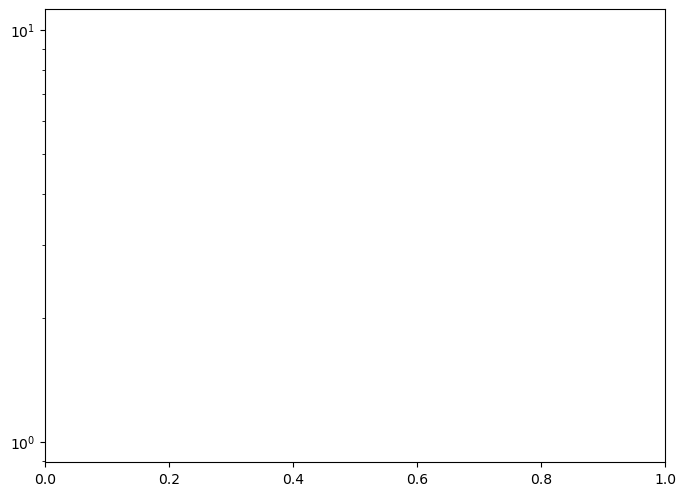

In [13]:
# """ The training loss of the second model """
def plot_lineplot(data, labels, line_styles, ylabel, label_names, title=None, log_scale=False, legend=False):
    epochs = data['epoch']
    if log_scale:
        plt.yscale("log")
    for label, style in zip(labels, line_styles):
        plt.plot(epochs, data[label], label=label, 
                 color = style[0], marker = style[1], markersize = 5, linewidth = 0.3, markevery=1)
    plt.xlabel('Epoch (-)', fontsize=20)
    #plt.xticks(fontsize=12, rotation=90)
    if label_names:
        plt.legend(label_names, fontsize=12)
    else:
        plt.legend()
    plt.ylabel(ylabel, fontsize=20)
    if legend:
        plt.legend()
#     plt.title(title, fontsize=18)
    return

target_dir = "log_files"
log_path = os.path.join(target_dir, 'log_second_7.txt')
f = open(log_path, 'r')
train_log = f.readlines()
f.close()
epoch_dict = dict()
for i, line in enumerate(train_log):
    if 'epoch: ' in line:
        number = int(line.strip('\n').split(': ')[-1])
        epoch_dict[number] = dict()
        epoch_dict[number]['ranking loss'] = float(train_log[i+1].strip('\n').split(': ')[-1])
        epoch_dict[number]['temperature loss'] = float(train_log[i+2].strip('\n').split(': ')[-1])
        epoch_dict[number]['combined multitask loss'] = float(train_log[i+3].strip('\n').split(': ')[-1])
        epoch_dict[number]['ranking task'] = np.exp(float(train_log[i+4].strip('\n').split(': ')[-1]))
        epoch_dict[number]['temperature task'] = np.exp(float(train_log[i+5].strip('\n').split(': ')[-1]))

plt.figure(figsize=(8, 6), dpi=100)
plot_summary_first(epoch_dict, labels = ['ranking loss', 'temperature loss', 'combined multitask loss'], 
                    line_styles = [('orange',None), ('green',None), ('purple',None)],
                    ylabel='Loss (-)', label_names = ['ranking loss', 'temperature loss', 'combined multitask loss'],
                    log_scale = True, legend = False)
plt.legend(fontsize = 16, bbox_to_anchor=(1.6, 0.6))

In [14]:
epoch_dict

{1: {'ranking loss': 0.40977,
  'temperature loss': 1301.78442,
  'combined multitask loss': 452.36191,
  'ranking task': 0.4756847186416878,
  'temperature task': 3.465995870979486},
 'epoch': 80,
 2: {'ranking loss': 0.34029,
  'temperature loss': 901.69745,
  'combined multitask loss': 186.91954,
  'ranking task': 0.15881742610692068,
  'temperature task': 7.344854499739358},
 3: {'ranking loss': 0.29332,
  'temperature loss': 732.81598,
  'combined multitask loss': 81.15576,
  'ranking task': 0.13506488316034912,
  'temperature task': 12.097514278865066},
 4: {'ranking loss': 0.25733,
  'temperature loss': 621.7016,
  'combined multitask loss': 47.30322,
  'ranking task': 0.11871851595740292,
  'temperature task': 17.167189931780978},
 5: {'ranking loss': 0.24013,
  'temperature loss': 590.13208,
  'combined multitask loss': 32.97339,
  'ranking task': 0.1178903881744604,
  'temperature task': 24.557074997661335},
 6: {'ranking loss': 0.22295,
  'temperature loss': 587.42517,
  'co

KeyError: 'solvent task'

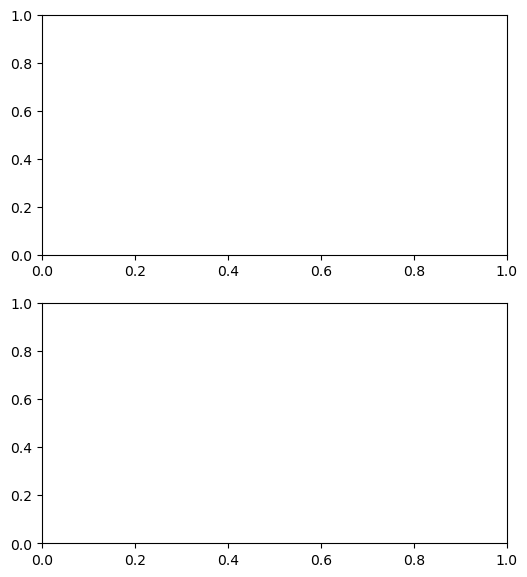

In [15]:
""" The uncertainty values of the four tasks """

#plt.figure(, dpi=800)
fig, ax = plt.subplots(2, 1, figsize = (6, 7), dpi =100)

targets = [('solvent task', 'reagent task'), ('ranking task', 'temperature task')]
colors = ['red','blue','orange','green']

for i, (target_1, target_2) in enumerate(targets):
    target_1_values = [z[target_1] for z in epoch_dict.values()]
    target_2_values = [z[target_2] for z in epoch_dict.values()]
    if i == 1:
        plt.yscale('log')
        ax[i].set_ylabel('log(Variance) (-)', fontsize=20)
    elif i==0:
        ax[i].set_ylabel('Variance (-)', fontsize=20)
    ax[i].plot(epoch_dict.keys(), target_1_values,
                  color = colors[2*i],
                  label = target_1)
    ax[i].plot(epoch_dict.keys(), target_2_values, 
                  color = colors[2*i+1],
                  label = target_2)
    ax[i].set_xlabel('Epoch', fontsize=16)
      
# set legend position
fig.legend(bbox_to_anchor=(1.52, 0.65), fontsize=18)
  
# set spacing to subplots
fig.tight_layout()  
plt.show()